# Pandas

[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/davemlz/spyndex/blob/main/docs/tutorials/pandas.ipynb)
![level3](https://raw.githubusercontent.com/davemlz/spyndex/main/docs/_static/level3.png)

After passing levels 1 and 2, you are ready to start this: Level 3 - `spyndex + pandas`!

Remember to install `spyndex`!

In [ ]:
!pip install -U spyndex

Now, let's start!

First, import `spyndex` and `pandas`:

In [31]:
import spyndex
import pandas as pd

## `pandas.Series`

We have all worked with `pandas`. Well, `spyndex` also works with `pandas` so you can continue using it! :)

Let's use a `pandas.DataFrame` that is stored in the `spyndex` datasets: `spectral`:

In [59]:
df = spyndex.datasets.open("spectral")

Each column of this dataset is the Surface Reflectance from Landsat 8 for 3 different classes. The samples were taken over Oporto:

In [33]:
df.head()

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,ST_B10,class
0,0.089850,0.100795,0.132227,0.165764,0.269054,0.306206,0.251949,297.328396,Urban
1,0.073859,0.086990,0.124404,0.160979,0.281264,0.267596,0.217917,297.107934,Urban
2,0.072938,0.086028,0.120994,0.140203,0.284220,0.258384,0.200098,297.436064,Urban
3,0.087733,0.103916,0.135981,0.163976,0.254479,0.259580,0.216735,297.203638,Urban
4,0.090593,0.109306,0.150350,0.181260,0.269535,0.273234,0.219554,297.097680,Urban


Here you can see the classes stored in the `class` column:

In [34]:
df["class"].unique()

array(['Urban', 'Water', 'Vegetation'], dtype=object)

Each column of the data frame is a `pandas.Series` data type:

In [35]:
type(df["SR_B2"])

pandas.core.series.Series

Well, we can use that to compute Spectral Indices with `spyndex`!

Since we have `vegetation`, `water` and `urban` classes, let's compute 3 different indices, each one highlighting an specific class: `NDVI`, `NDWI` and `NDBI`:

In [36]:
spyndex.indices.NDVI

NDVI: Normalized Difference Vegetation Index (attributes = ['bands', 'contributor', 'date_of_addition', 'formula', 'long_name', 'reference', 'short_name', 'type'])

In [37]:
spyndex.indices.NDWI

NDWI: Normalized Difference Water Index (attributes = ['bands', 'contributor', 'date_of_addition', 'formula', 'long_name', 'reference', 'short_name', 'type'])

In [38]:
spyndex.indices.NDBI

NDBI: Normalized Difference Built-Up Index (attributes = ['bands', 'contributor', 'date_of_addition', 'formula', 'long_name', 'reference', 'short_name', 'type'])

What bands do we need?

In [39]:
spyndex.indices.NDVI.bands

('N', 'R')

In [40]:
spyndex.indices.NDWI.bands

('G', 'N')

In [41]:
spyndex.indices.NDBI.bands

('S1', 'N')

Green, Red, NIR and SWIR1 bands... easy!

In [42]:
parameters = {
    "G": df["SR_B3"],
    "R": df["SR_B4"],
    "N": df["SR_B5"],
    "S1": df["SR_B6"],
}

With our `dict` of parameters ready we can compute the indices!

In [43]:
idx = spyndex.computeIndex(["NDVI","NDWI","NDBI"],parameters)

And, what's the data type of the result?

In [44]:
print(f"idx type: {type(idx)}")

idx type: <class 'pandas.core.frame.DataFrame'>


That's right! A `pandas.DataFrame`! Why? Because each computed spectral index is now a column (`pandas.Series`) of a new dataframe:

In [45]:
idx.head()

,NDVI,NDWI,NDBI
0,0.237548,-0.340973,0.064584
1,0.271989,-0.386671,-0.024902
2,0.339326,-0.402815,-0.047615
3,0.216278,-0.303482,0.009923
4,0.195821,-0.283852,0.006815


If you want them diectly on the original dataframe as new columns, you just have to play with the code a little bit!

In [60]:
indicesToCompute = ["NDVI","NDWI","NDBI"]
df[indicesToCompute] = spyndex.computeIndex(indicesToCompute,parameters)

Now, if you check you original dataframe, you should have the new indices there!

In [61]:
df.head()

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,ST_B10,class,NDVI,NDWI,NDBI
0,0.089850,0.100795,0.132227,0.165764,0.269054,0.306206,0.251949,297.328396,Urban,0.237548,-0.340973,0.064584
1,0.073859,0.086990,0.124404,0.160979,0.281264,0.267596,0.217917,297.107934,Urban,0.271989,-0.386671,-0.024902
2,0.072938,0.086028,0.120994,0.140203,0.284220,0.258384,0.200098,297.436064,Urban,0.339326,-0.402815,-0.047615
3,0.087733,0.103916,0.135981,0.163976,0.254479,0.259580,0.216735,297.203638,Urban,0.216278,-0.303482,0.009923
4,0.090593,0.109306,0.150350,0.181260,0.269535,0.273234,0.219554,297.097680,Urban,0.195821,-0.283852,0.006815


Beautiful! Right?

Now, just for the sake of life, let's make some visualizations!

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

Define some colors for each one of the classes:

In [49]:
colors = ["#E33F62","#3FDDE3","#4CBA4B"]

Now, let's create a gorgeous pair grid!

<Figure size 1080x1080 with 0 Axes>

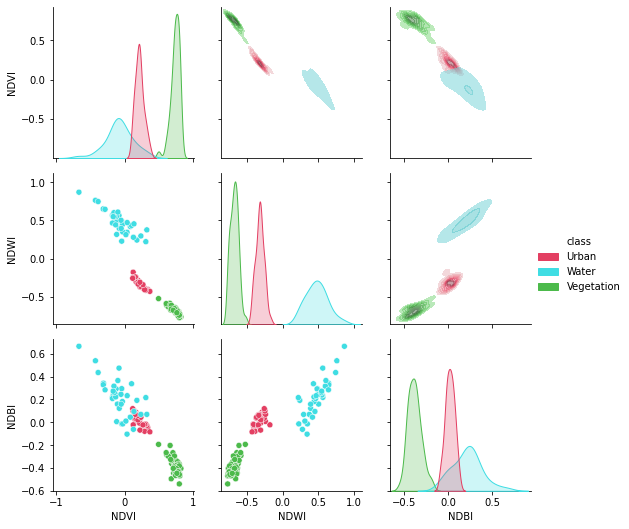

In [64]:
plt.figure(figsize = (15,15))
g = sns.PairGrid(df[['NDVI', 'NDWI', 'NDBI','class']],hue = "class",palette = sns.color_palette(colors))
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot,fill = True,alpha = .5)
g.map_diag(sns.kdeplot,fill = True)
g.add_legend()
plt.show()